# Sarcasm Detection

https://www.kaggle.com/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection -> source of the code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from wordcloud import WordCloud

In [2]:
import kagglehub

# Download the Kaggle dataset for sarcasm detection
path = kagglehub.dataset_download("rmisra/news-headlines-dataset-for-sarcasm-detection")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rmisra/news-headlines-dataset-for-sarcasm-detection/versions/2


In [3]:
import os

downloaded_files = os.listdir(path)
print(downloaded_files)

['Sarcasm_Headlines_Dataset_v2.json', 'Sarcasm_Headlines_Dataset.json']


In [4]:
# # Step 1: Load the dataset: Load the dataset from the downloaded path
file_path = os.path.join(path, "Sarcasm_Headlines_Dataset.json")  # Update the filename if necessary
df = pd.read_json(file_path, lines=True)

In [5]:
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
df['is_sarcastic'] = df['is_sarcastic'].map({0: 'Not Sarcasm', 1: 'Sarcasm'})
df.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,Not Sarcasm
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,Not Sarcasm
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,Sarcasm
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",Sarcasm
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,Not Sarcasm


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  object
dtypes: object(3)
memory usage: 626.1+ KB


In [8]:
df.isnull().sum()

,0
article_link,0
headline,0
is_sarcastic,0


In [9]:
df['is_sarcastic'].value_counts()

,count
is_sarcastic,
Not Sarcasm,14985
Sarcasm,11724


<ipython-input-10-2299c6a4fbac>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")


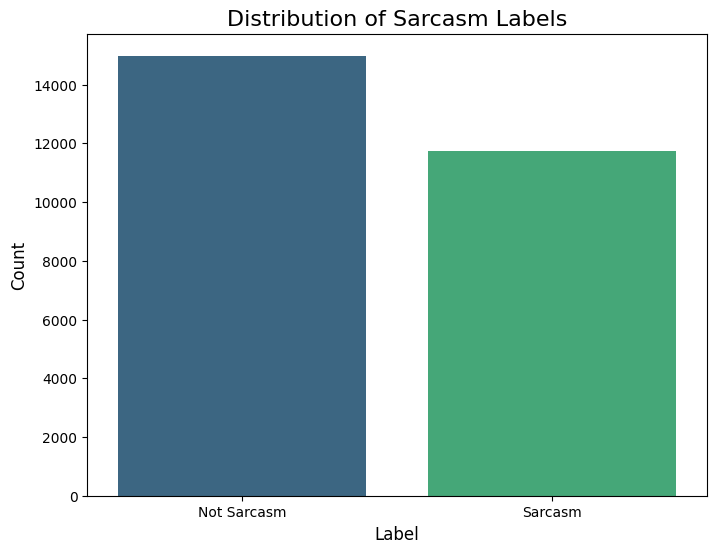

In [10]:
# Plot the distribution of sarcasm labels
label_counts = df['is_sarcastic'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
plt.title("Distribution of Sarcasm Labels", fontsize=16)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

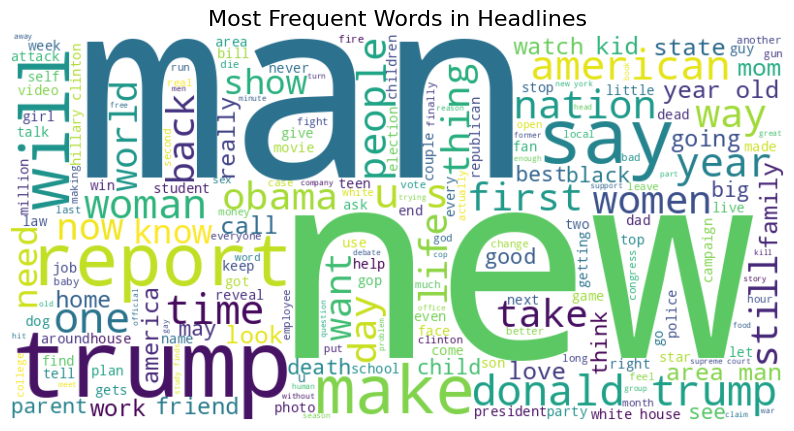

In [11]:
# Generate a word cloud for the headlines
text = " ".join(df['headline'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Headlines", fontsize=16)
plt.show()

In [12]:
df = df[['headline', 'is_sarcastic']]

In [13]:
# Prepare data for machine learning
x = np.array(df['headline']) # Headlines as input features
y = np.array(df['is_sarcastic']) # Sarcasm labels as target

In [14]:
# Initialize CountVectorizer to convert text data into numerical features
cv = CountVectorizer()

In [15]:
# Transform the headlines into a sparse matrix of word counts
X = cv.fit_transform(x)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [18]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8448


In [19]:
# Take input from the user, transform it, and make predictions
user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: Cows lose their jobs as milk prices drop
['Sarcasm']
